
# استخراج فرمول مراکز جدید در K-Means

## تابع هدف (WCSS)

$$
J = \sum_{j=1}^{k} \sum_{\mathbf{x} \in C_j} \| \mathbf{x} - \boldsymbol{\mu}_j \|^2
$$

---

## گام ۱: ثابت فرض کردن خوشه و تعریف تابع جزئی

برای خوشه‌ی $j$:

$$
f_j(\boldsymbol{\mu}_j) = \sum_{\mathbf{x} \in C_j}
\| \mathbf{x} - \boldsymbol{\mu}_j \|^2
$$

با بسط نُرم:

$$
\| \mathbf{x} - \boldsymbol{\mu}_j \|^2
= (\mathbf{x} - \boldsymbol{\mu}_j)^T(\mathbf{x} - \boldsymbol{\mu}_j)
$$

---

## گام ۲: مشتق‌گیری برداری

$$
\frac{\partial f_j}{\partial \boldsymbol{\mu}_j}
= \sum_{\mathbf{x} \in C_j} 2(\boldsymbol{\mu}_j - \mathbf{x})
$$

---

## گام ۳: شرط بهینگی (صفر شدن گرادیان)

$$
\sum_{\mathbf{x} \in C_j} 2(\boldsymbol{\mu}_j - \mathbf{x}) = 0
$$

$$
|C_j| \boldsymbol{\mu}_j = \sum_{\mathbf{x} \in C_j} \mathbf{x}
$$

---

## نتیجه نهایی

$$
\boxed{
\boldsymbol{\mu}_j^{\text{new}} =
\frac{1}{|C_j|}
\sum_{\mathbf{x} \in C_j} \mathbf{x}
}
$$


## تفسیر شهودی

مرکز خوشه نقطه‌ای است که مجموع فاصله‌های مربع‌شده
نقاط خوشه تا آن کمینه می‌شود.
از نظر هندسی، این نقطه همان «نقطه تعادل» است،
و از نظر آماری، میانگین نمونه‌ای نقاط خوشه محسوب می‌شود.


# 2   Elbow

<div dir=rtl>
الگوریتم K-Means نیاز دارد که تعداد خوشه‌ها 
𝐾
K از قبل مشخص شود.

در عمل، معمولاً ساختار واقعی داده ناشناخته است و انتخاب 
𝐾
K یک مسئله‌ی مدل‌سازی محسوب می‌شود.

روش Elbow یک روش ابتکاری (heuristic) و تحلیل‌محور برای انتخاب مقدار مناسب 
𝐾
K است.

معیار اصلی در این روش:

WCSS (Within-Cluster Sum of Squares)
که میزان پراکندگی درون خوشه‌ها را اندازه‌گیری می‌کند.

نقطه آرنج (Elbow Point) جایی است که:

با افزایش 
𝐾
K،

کاهش WCSS دیگر چشمگیر نیست

یعنی:

از این نقطه به بعد، افزایش تعداد خوشه‌ها «ارزش هزینه‌ی پیچیدگی مدل» را ندارد.



===========

چه زمانی نمودار Elbow واضح نیست؟
حالت‌های رایج
1) داده فاقد ساختار خوشه‌ای واقعی

داده تقریباً پیوسته یا تصادفی است

WCSS به‌صورت یکنواخت و نرم کاهش می‌یابد

هیچ شکست شیب مشخصی وجود ندارد

 تفسیر:

داده ذاتاً خوشه‌پذیر نیست

2) خوشه‌ها هم‌پوشانی شدید دارند

مرز خوشه‌ها واضح نیست

K-Means مجبور به تقسیم مصنوعی داده می‌شود

فرض خوشه‌های کروی و جداگانه نقض شده است



# 3  Hungarian

<div dir=rtl>
در خوشه‌بندی بدون ناظر، برچسب‌های خوشه صرفاً شناسه هستند، نه معنا.
رض کنید دیتاست ارقام دست‌نویس داریم:

K-Means سه خوشه تولید کرده است:
Cluster 0, Cluster 1, Cluster 2

اما واقعیت این است که:

Cluster 0 ≈ عدد 7

Cluster 1 ≈ عدد 1

Cluster 2 ≈ عدد 4

====================

K-Means خوشه‌ها را درست پیدا می‌کند، ولی اسم خوشه‌ها اشتباه است.
Hungarian فقط اسم‌ها را درست می‌کند.
سه دانش‌آموز داریم

سه صندلی

همه سر جای درست نشسته‌اند

ولی اسم صندلی‌ها جابه‌جا نوشته شده

Hungarian:

تابلو اسم صندلی‌ها را عوض می‌کند،
نه اینکه دانش‌آموزها را جابه‌جا کند.
گوریتم Hungarian برای این استفاده می‌شود که بهترین تطابق ممکن بین خوشه‌های بدون‌معنا و کلاس‌های واقعیِ معنادار را پیدا کند، تا ارزیابی خوشه‌بندی به‌صورت منصفانه انجام شود.


خطای مفهومی (مهم‌ترین خطا)

ماهیت خطا:

در خوشه‌بندی:

برچسب خوشه‌ها هیچ معنایی ندارند

در کلاس‌بندی:

برچسب‌ها معنادارند

اگر این دو را مستقیم مقایسه کنیم، در واقع داریم:

«اسم‌های دلخواه» را با «مفاهیم واقعی» مقایسه می‌کنیم

این یک اشتباه در تعریف مسئله است، نه در الگوریتم.

به دلیل همان اشتباه مفهومی:

Accuracy به‌صورت غیرواقعی پایین گزارش می‌شود

حتی اگر خوشه‌بندی کاملاً درست باشد  مدل به‌اشتباه «ضعیف» تلقی می‌شود
یک Post-processing استاندارد در ارزیابی K-Means است

مخصوصاً وقتی از معیارهایی مثل Accuracy استفاده می‌کنیم

==================================

الگوریتم Hungarian بهترین نگاشت یک‌به‌یک بین خوشه‌ها و کلاس‌ها را پیدا می‌کند،
اگر مجبور باشیم هر خوشه فقط به یک کلاس وصل شود،
کدام جفت‌سازی بیشترین شباهت واقعی را نشان می‌دهد؟»
Hungarian تضمین می‌کند که:

هر خوشه ← فقط به یک کلاس

هر کلاس ← فقط به یک خوشه

نگاشت انتخاب‌شده:

بیشترین تعداد نمونه‌ی درست را پوشش دهد

و بهینه‌ی سراسری باشد (نه حدسی یا محلی)
<div>

# 4   Normalized Mutual Information (NMI)  وAdjusted Rand Index (ARI)

<div dir=rtl>
ایده‌ی کلی (در یک جمله)

NMI می‌پرسد:

«خوشه‌ها چقدر درباره‌ی کلاس‌های واقعی اطلاعات می‌دهند؟»

ARI می‌پرسد:

«الگوریتم، افراد درست را کنار هم گذاشته یا نه (نسبت به شانس)؟»

در دیتاست Iris،
NMI نشان می‌دهد که خوشه‌های K-Means تا چه حد اطلاعات مربوط به نوع گل را منتقل می‌کنند،
در حالی که ARI بررسی می‌کند آیا گل‌های هم‌نوع واقعاً کنار هم قرار گرفته‌اند یا خیر.
ممکن است در حالتی که Setosa جدا ولی Versicolor و Virginica مخلوط هستند، NMI نسبتاً بالا ولی ARI پایین باشد که نشان‌دهنده‌ی انتقال اطلاعات بدون حفظ ساختار دقیق است.



دیتاست Iris خیلی کوتاه

150 گل

3 کلاس واقعی:

Setosa

Versicolor

Virginica

هر گل 4 ویژگی دارد (طول/عرض کاسبرگ و گلبرگ)

فرض کن ما K-Means با K=3 اجرا کرده‌ایم و حالا می‌خواهیم خروجی را با برچسب واقعی مقایسه کنیم.

==> NMI روی Iris (خیلی ساده)
سؤال NMI در Iris چیست؟

اگر فقط بدانم یک گل در کدام خوشه افتاده،
چقدر می‌توانم حدس بزنم از کدام نوع گل است؟

حالت خوب:

یک خوشه تقریباً فقط Setosa

یک خوشه بیشتر Versicolor

یک خوشه بیشتر Virginica

 وقتی خوشه را می‌بینی، تقریباً می‌فهمی نوع گل چیست
 NMI بالا

 حتی اگر:

Versicolor و Virginica کمی قاطی شوند
NMI هنوز می‌تواند نسبتاً بالا بماند
چون هنوز «اطلاعات» منتقل می‌شود.

 ARI روی Iris (خیلی ساده)
سؤال ARI در Iris چیست؟

دو گل که واقعاً هم‌نوع هستند،
آیا الگوریتم آن‌ها را کنار هم گذاشته؟

نگاه ARI:

هر دو گل Setosa:

اگر در یک خوشه‌اند → درست

اگر جدا افتاده‌اند → خطا

همین برای همه‌ی زوج‌ها (خیلی زیاد!)

 اگر چند گل Virginica اشتباه داخل خوشه Versicolor بیفتند:

تعداد زیادی زوج اشتباه ایجاد می‌شود

ARI سریع پایین می‌آید   ARI به اشتباهات کوچک هم حساس است

مثال خیلی ملموس با Iris
مثال ۱: خوشه‌بندی ظاهراً خوب  Setosa تقریباً کاملاً جدا شده    Versicolor و Virginica  قاطی‌اند 

نتیجه:

وقتی خوشه را می‌بینی، هنوز حدس خوبی از کلاس داری
→ NMI نسبتاً بالا

اما بسیاری از گل‌های هم‌نوع کنار هم نیستند
→ ARI پایین‌تر

 تفسیر:

«اطلاعات هست، ولی ساختار دقیق نیست»

مثال ۲: فقط چند گل مرزی اشتباه شده‌اند

بیشتر Versicolorها کنار هم

بیشتر Virginicaها کنار هم

فقط چند نمونه مرزی جابه‌جا شده‌اند

نتیجه:

زوج‌های درست زیادند
→ ARI بالا

هنوز کمی عدم قطعیت وجود دارد
→ NMI متوسط

 تفسیر:

«ساختار خوب است، ولی تفکیک کامل نیست»  

ر دیتاست Iris،
NMI نشان می‌دهد که خوشه‌های K-Means تا چه حد اطلاعات مربوط به نوع گل را منتقل می‌کنند،
در حالی که ARI بررسی می‌کند آیا گل‌های هم‌نوع واقعاً کنار هم قرار گرفته‌اند یا خیر.
ممکن است در حالتی که Setosa جدا ولی Versicolor و Virginica مخلوط هستند، NMI نسبتاً بالا ولی ARI پایین باشد که نشان‌دهنده‌ی انتقال اطلاعات بدون حفظ ساختار دقیق است.
<div>

<div dir=rtl>
و معیار NMI و ARI نسبت به جابه‌جایی برچسب خوشه‌ها (label permutation) پایا هستند یا ناپایا؟ چرا؟


هر دو معیار NMI و ARI نسبت به جابه‌جایی برچسب خوشه‌ها کاملاً پایا (Invariant) هستند
زیرا هیچ‌کدام به شماره‌ی خوشه‌ها وابسته نیستند، بلکه فقط به روابط بین نمونه‌ها و توزیع آن‌ها توجه می‌کنند.

خوشه 0 → Setosa
خوشه 1 → Versicolor
خوشه 2 → Virginica

خوشه 5 → Setosa
خوشه 0 → Versicolor
خوشه 3 → Virginica

چرا NMI پایاست؟

NMI می‌پرسد:

«داخل هر خوشه چه کلاس‌هایی وجود دارد و با چه نسبتی؟»

برای NMI مهم نیست اسم خوشه چیست

فقط مهم است چه نمونه‌هایی کنار هم‌اند

جابه‌جایی شماره‌ی خوشه‌ها، ترکیب داخل خوشه را عوض نمی‌کند

 پس:

NMI نسبت به label permutation کاملاً پایاست

چرا ARI پایاست؟

ARI می‌پرسد:

«دو نمونه با هم هستند یا جدا؟»

اگر دو نمونه قبل از جابه‌جایی برچسب‌ها با هم بودند، بعدش هم با هم‌اند

اگر جدا بودند، جدا می‌مانند

اسم خوشه هیچ نقشی ندارد

 پس:

ARI نیز نسبت به label permutation کاملاً پایاست

هر دو معیار NMI و ARI نسبت به جابه‌جایی برچسب خوشه‌ها پایا هستند، زیرا شماره‌ی خوشه‌ها فاقد معنای ذاتی است و این معیارها تنها بر اساس توزیع نمونه‌ها و روابط زوجی بین آن‌ها عمل می‌کنند.
<div>

<div dir=rtl>
در چه شرایطی ممکن است مقدار  ARIو  NMIبرای یک خوشهبندی اختلاف قابل توجهی داشته باشند و این اختلاف
چگونه قابل تفسیر است؟

=============================

ختلاف قابل توجه بین ARI و NMI زمانی رخ می‌دهد که خوشه‌بندی از نظر انتقال اطلاعات کلی خوب باشد اما از نظر حفظ ساختار دقیق نمونه‌ها ضعیف عمل کند (یا برعکس).

NMI به این نگاه می‌کند:

«آیا خوشه‌ها به‌طور کلی می‌گویند داده متعلق به کدام کلاس است؟»

ARI به این نگاه می‌کند:

«آیا نمونه‌های هم‌کلاس واقعاً کنار هم قرار گرفته‌اند؟»

پس طبیعی است که گاهی یکی بالا و دیگری پایین باشد.

اختلاف بین ARI و NMI معمولاً زمانی رخ می‌دهد که خوشه‌بندی از نظر انتقال اطلاعات کلی مناسب باشد اما روابط دقیق بین نمونه‌ها را حفظ نکرده باشد (یا بالعکس). NMI بیشتر وابستگی اطلاعاتی را می‌سنجد، در حالی که ARI نسبت به حفظ ساختار زوجی داده‌ها حساس‌تر و سخت‌گیرتر است.

| وضعیت                    | NMI   | ARI   | تفسیر                    |
| ------------------------ | ----- | ----- | ------------------------ |
| خوشه‌ها خالص ولی خرد شده | بالا  | پایین | اطلاعات هست، ساختار نیست |
| داده نامتوازن            | بالا  | پایین | تسلط کلاس بزرگ           |
| خوشه‌بندی واقعاً خوب     | بالا  | بالا  | هم اطلاعات، هم ساختار    |


در دیتاست Iris، معمولاً مقدار NMI بالاتر از ARI به دست می‌آید، زیرا خوشه‌های K-Means اطلاعات کلی مناسبی درباره‌ی کلاس‌ها منتقل می‌کنند (به‌ویژه جداسازی کامل Setosa)، اما به دلیل هم‌پوشانی ذاتی Versicolor و Virginica، بسیاری از گل‌های هم‌نوع در خوشه‌های متفاوت قرار می‌گیرند که باعث کاهش ARI می‌شود.


خوشه 1: 40% Setosa + 30% Versicolor + 30% Virginica
خوشه 2: 35% Setosa + 35% Versicolor + 30% Virginica
خوشه 3: 25% Setosa + 35% Versicolor + 40% Virginica


اگر در دیتاست Iris مقدار ARI بالا ولی NMI پایین مشاهده شود، به این معناست که الگوریتم روابط محلی بین گل‌های هم‌نوع را حفظ کرده، اما خوشه‌ها از نظر اطلاعاتی نماینده‌ی کلاس‌های واقعی نیستند و هر خوشه شامل ترکیبی از چند نوع گل است. در نتیجه، خوشه‌بندی از نظر تفسیرپذیری و معنا شکست خورده است.



<div>

<div dir=rtl>
#  سؤال 5
معیارهای ارزیابی مانند  ARIو  NMIبا دقت ) (Accuracyچه تفاوتی دارند؟ توضیح دهید:


==========================

ستفاده‌ی مستقیم از Accuracy برای ارزیابی خروجی یک الگوریتم خوشه‌بندی مناسب نیست،
زیرا برچسب‌های خوشه‌ها معنای ذاتی ندارند و Accuracy به شماره‌ی برچسب‌ها وابسته است،
در حالی که خوشه‌بندی بدون ناظر به ساختار داده‌ها توجه دارد، نه تطابق اسمی برچسب‌ها.

Setosa → 0
Versicolor → 1
Virginica → 2


Setosa → 2
Versicolor → 0
Virginica → 1


ز نظر انسانی:

خوشه‌بندی کاملاً درست است

اما:

چون شماره‌ها فرق دارند:

Accuracy = 0%

| ویژگی                    | Accuracy | معیارهای خوشه‌بندی (ARI/NMI) |
| ------------------------ | -------- | ---------------------------- |
| مناسب خوشه‌بندی؟         | ❌ نه     | ✅ بله                        |
| مستقل از شماره برچسب؟    | ❌ نه     | ✅ بله                        |
| بررسی ساختار داده        | ❌ نه     | ✅ بله                        |
| پایا نسبت به permutation | ❌ نه     | ✅ بله                        |


Accuracy برای خوشه‌بندی بدون ناظر مناسب نیست، زیرا به تطابق مستقیم شماره‌ی برچسب‌ها وابسته است و نسبت به جابه‌جایی برچسب خوشه‌ها ناپایاست. در مقابل، خوشه‌بندی به دنبال کشف ساختار داده‌هاست و باید با معیارهایی ارزیابی شود که مستقل از نام‌گذاری خوشه‌ها عمل کنند.

) استقلال از شماره‌ی خوشه‌ها (Label Invariance)
چرا مهم است؟

در خوشه‌بندی، عدد خوشه‌ها معنای ذاتی ندارند

معیار خوب نباید به این اعداد وابسته باشد

وضعیت:

ARI و NMI → مستقل از شماره خوشه‌ها

Accuracy → وابسته و گمراه‌کننده

 این ویژگی پایه‌ای‌ترین دلیل جذابیت آن‌هاست.

۲) تصحیح نسبت به شانس (Chance Correction) — مخصوص ARI
مشکل بدون تصحیح:

حتی یک خوشه‌بندی تصادفی می‌تواند نمره‌ی مثبت بگیرد

ARI چه می‌کند؟

عملکرد تصادفی را مبنای صفر قرار می‌دهد

اگر:

بهتر از شانس → ARI > 0

مثل شانس → ARI ≈ 0

بدتر از شانس → ARI < 0

 این باعث می‌شود مقایسه‌ها منصفانه و قابل تفسیر باشند.

۳) سنجش اطلاعات مشترک — مخصوص NMI
ایده‌ی اصلی:

NMI بررسی می‌کند:

«خوشه‌بندی چقدر از عدم‌قطعیت کلاس‌های واقعی را کاهش می‌دهد؟»

مزیت:

به ساختار کلی توزیع داده‌ها توجه می‌کند

نشان می‌دهد خوشه‌ها تا چه حد «معنادار» هستند

 این نگاه اطلاعاتی در بسیاری از کاربردها بسیار طبیعی‌تر است.

۴) توجه به ساختار داده (نه فقط تطابق اسمی)
ARI:

روابط زوجی نمونه‌ها را بررسی می‌کند

حفظ هم‌گروهی و جدایی را می‌سنجد

NMI:

توزیع کلاس‌ها داخل خوشه‌ها را بررسی می‌کند

میزان اختلاط یا خلوص خوشه‌ها را می‌سنجد

 هر دو به «ساختار واقعی داده» توجه دارند.

۵) قابل‌تفسیر بودن نتایج
ARI:

صفر = تصادفی

مثبت = بهتر از شانس

منفی = بدتر از شانس

NMI:

صفر = عدم وابستگی

یک = تطابق کامل اطلاعاتی

 این تفسیرپذیری، تحلیل نتایج را ساده و حرفه‌ای می‌کند.

 اگر تنها به Accuracy تکیه کنیم، ممکن است یک خوشه‌بندی درست را کاملاً بد یا یک خوشه‌بندی ضعیف را خوب تلقی کنیم، زیرا Accuracy به شماره‌ی برچسب‌ها وابسته است و ساختار واقعی داده‌ها را در نظر نمی‌گیرد.

 | وضعیت واقعی خوشه‌بندی            | Accuracy چه می‌گوید؟ | واقعیت چیست؟ | سوءبرداشت           |
| -------------------------------- | -------------------- | ------------ | ------------------- |
| خوشه‌بندی کامل، برچسب‌ها جابه‌جا | بسیار پایین          | عالی         | «مدل بد است»        |
| همه در یک خوشه                   | بالا                 | افتضاح       | «مدل خوب است»       |
| ساختار خوب، نام‌گذاری متفاوت     | متوسط/پایین          | خوب          | «مدل ضعیف است»      |
| خوشه‌بندی تصادفی با تطابق اتفاقی | متوسط                | بد           | «مدل قابل قبول است» |

<div>

<div dir=rtl>

# 6  

| ویژگی           | K-Means    | DBSCAN    | Hierarchical      |
| --------------- | ---------- | --------- | ----------------- |
| نوع یادگیری     | بدون ناظر  | بدون ناظر | بدون ناظر         |
| فرض شکل خوشه    | کروی       | چگالتی    | وابسته به linkage |
| نیاز به K       | ✔️         | ❌         | ❌                 |
| تشخیص نویز      | ❌          | ✔️        | ❌                 |
| حساسیت به مقیاس | زیاد       | زیاد      | متوسط             |
| مقیاس‌پذیری     | بسیار بالا | متوسط     | پایین             |



# 7 

غیرمحدب بودن تابع هدف K-Means:

باعث وجود مینیمم‌های محلی متعدد می‌شود

نتیجه الگوریتم را به مقداردهی اولیه وابسته می‌کند.

K-Means:

تضمین کاهش خطا دارد

اما تضمین بهینه سراسری ندارد.

راهکارهای عملی:

K-Means++

اجرای چندباره

پیش‌پردازش مناسب داده

K-Means الگوریتمی سریع و قدرتمند است،
اما فقط زمانی که محدودیت‌های بهینه‌سازی آن را بشناسیم و مدیریت کنیم.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler


In [ ]:
# --------------------------------------------------
# 1) Load Digits dataset
# --------------------------------------------------
digits = load_digits()

X = digits.data      # feature matrix
y = digits.target    # true labels
images = digits.images  # 8x8 images


In [ ]:
# --------------------------------------------------
# 2) Dataset shape information
# --------------------------------------------------
n_samples, n_features = X.shape
n_classes = len(np.unique(y))

print("Number of samples:", n_samples)
print("Number of features:", n_features)
print("Number of classes:", n_classes)


Number of samples: 1797
Number of features: 64
Number of classes: 10


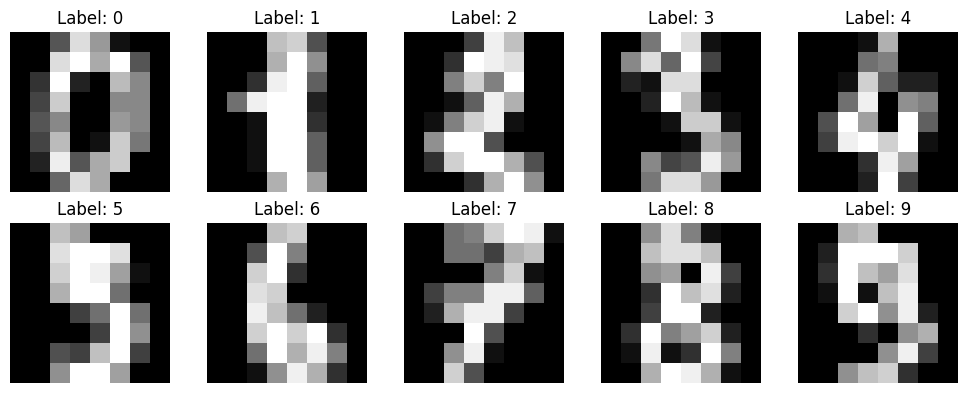

In [ ]:
# --------------------------------------------------
# 3) Visualize sample images
# --------------------------------------------------
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap="gray")
    ax.set_title(f"Label: {y[i]}")
    ax.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# --------------------------------------------------
# 4) Standardization
# --------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K_values = range(6, 15)

wcss_list = []
silhouette_list = []

for k in K_values:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=20
    )
    
    labels = kmeans.fit_predict(X_scaled)
    
    # WCSS (inertia)
    wcss_list.append(kmeans.inertia_)
    
    # Silhouette Score
    sil_score = silhouette_score(X_scaled, labels)
    silhouette_list.append(sil_score)


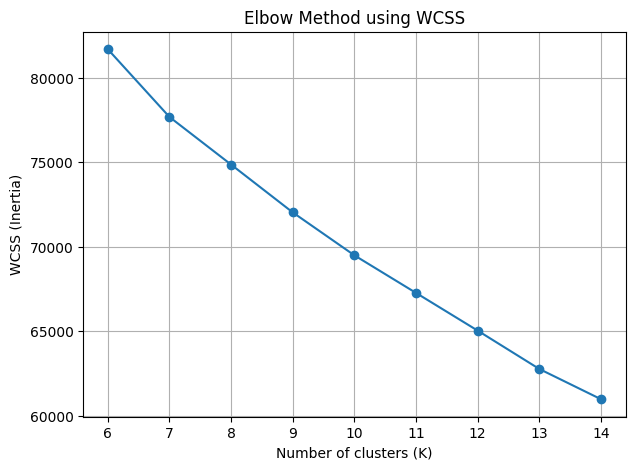

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(K_values, wcss_list, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method using WCSS")
plt.grid(True)
plt.show()


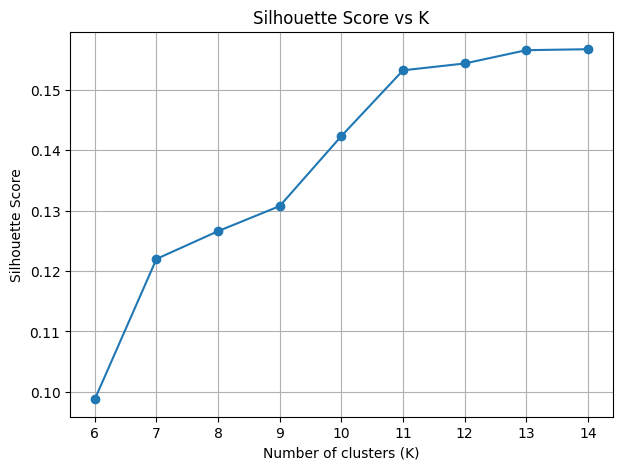

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(K_values, silhouette_list, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs K")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# فرض: X_scaled از بخش (الف) آماده است
# K منتخب
K = 10

seeds = [0, 1, 2, 3, 4, 10, 20, 42, 99, 123]

inertias = []
all_labels = []

for seed in seeds:
    km = KMeans(n_clusters=K, random_state=seed, n_init=1, init="k-means++")
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    all_labels.append(labels)

print("Inertia values across different initializations:")
for s, w in zip(seeds, inertias):
    print(f"seed={s:>3}  inertia={w:.4f}")

print("\nRange of inertia:")
print("min:", np.min(inertias))
print("max:", np.max(inertias))
print("difference:", np.max(inertias) - np.min(inertias))


Inertia values across different initializations:
seed=  0  inertia=69749.0825
seed=  1  inertia=70785.0304
seed=  2  inertia=69416.8400
seed=  3  inertia=71714.5312
seed=  4  inertia=71687.1250
seed= 10  inertia=72263.8512
seed= 20  inertia=70347.0426
seed= 42  inertia=69845.7847
seed= 99  inertia=69677.4012
seed=123  inertia=69747.3019

Range of inertia:
min: 69416.84000511424
max: 72263.8511760005
difference: 2847.011170886268


In [ ]:
print("\nPairwise similarity between clusterings (ARI between runs):")
base = all_labels[0]

for i in range(1, len(all_labels)):
    ari_runs = adjusted_rand_score(base, all_labels[i])
    print(f"run0 vs run{i}: ARI={ari_runs:.4f}")



Pairwise similarity between clusterings (ARI between runs):
run0 vs run1: ARI=0.7763
run0 vs run2: ARI=0.7491
run0 vs run3: ARI=0.6769
run0 vs run4: ARI=0.6689
run0 vs run5: ARI=0.6201
run0 vs run6: ARI=0.7269
run0 vs run7: ARI=0.7916
run0 vs run8: ARI=0.8383
run0 vs run9: ARI=0.9769


In [ ]:
import numpy as np

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics.cluster import contingency_matrix

# ------------------------------------------------------------
# 1) Load dataset
# ------------------------------------------------------------
digits = load_digits()
X = digits.data
y_true = digits.target

# ------------------------------------------------------------
# 2) Standardize features (recommended for distance-based methods)
# ------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------------------------------
# 3) Run K-Means with selected K
# ------------------------------------------------------------
K = 10  # you can set 10 or 11 based on your analysis
kmeans = KMeans(n_clusters=K, random_state=42, n_init=20)
y_pred = kmeans.fit_predict(X_scaled)

# ------------------------------------------------------------
# 4) Compute ARI and NMI (label-permutation invariant)
# ------------------------------------------------------------
ari = adjusted_rand_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)

print(f"ARI = {ari:.6f}")
print(f"NMI = {nmi:.6f}")
print(f"WCSS (inertia) = {kmeans.inertia_:.4f}")

# ------------------------------------------------------------
# 5) Build contingency matrix between true labels and clusters
#    Rows: true classes, Cols: predicted clusters
# ------------------------------------------------------------
C = contingency_matrix(y_true, y_pred)  # shape: (n_classes, K)
print("\nContingency matrix shape:", C.shape)

# ------------------------------------------------------------
# 6) Hungarian algorithm to find best one-to-one mapping
#    We maximize matches -> minimize negative matches (cost)
# ------------------------------------------------------------
try:
    from scipy.optimize import linear_sum_assignment
    row_ind, col_ind = linear_sum_assignment(-C)  # maximize C
except Exception:
    # Fallback if SciPy is not available: greedy (not optimal)
    # This fallback is provided for robustness, but Hungarian is recommended.
    row_ind, col_ind = [], []
    C_copy = C.copy()
    for _ in range(min(C_copy.shape[0], C_copy.shape[1])):
        r, c = np.unravel_index(np.argmax(C_copy), C_copy.shape)
        row_ind.append(r)
        col_ind.append(c)
        C_copy[r, :] = -1
        C_copy[:, c] = -1
    row_ind = np.array(row_ind)
    col_ind = np.array(col_ind)

# mapping: cluster_id -> class_id
cluster_to_class = {cluster: cls for cls, cluster in zip(row_ind, col_ind)}

# ------------------------------------------------------------
# 7) Apply mapping to convert cluster labels into predicted classes
# ------------------------------------------------------------
y_mapped = np.vectorize(lambda c: cluster_to_class.get(c, -1))(y_pred)

# ------------------------------------------------------------
# 8) Compute "apparent" Accuracy after mapping
# ------------------------------------------------------------
accuracy = np.mean(y_mapped == y_true)

print("\nBest mapping (cluster -> class):")
for cluster in sorted(cluster_to_class.keys()):
    print(f"  cluster {cluster:2d} -> class {cluster_to_class[cluster]}")

print(f"\nAccuracy after Hungarian mapping = {accuracy:.6f}")


ARI = 0.477962
NMI = 0.631911
WCSS (inertia) = 69486.5145

Contingency matrix shape: (10, 10)

Best mapping (cluster -> class):
  cluster  0 -> class 5
  cluster  1 -> class 0
  cluster  2 -> class 6
  cluster  3 -> class 4
  cluster  4 -> class 3
  cluster  5 -> class 8
  cluster  6 -> class 1
  cluster  7 -> class 2
  cluster  8 -> class 9
  cluster  9 -> class 7

Accuracy after Hungarian mapping = 0.608792


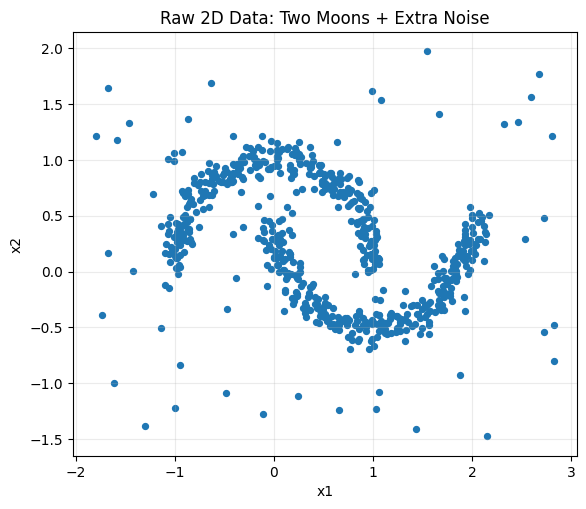

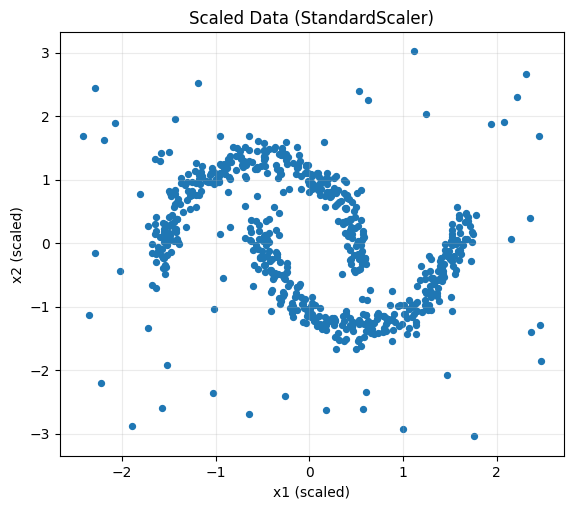

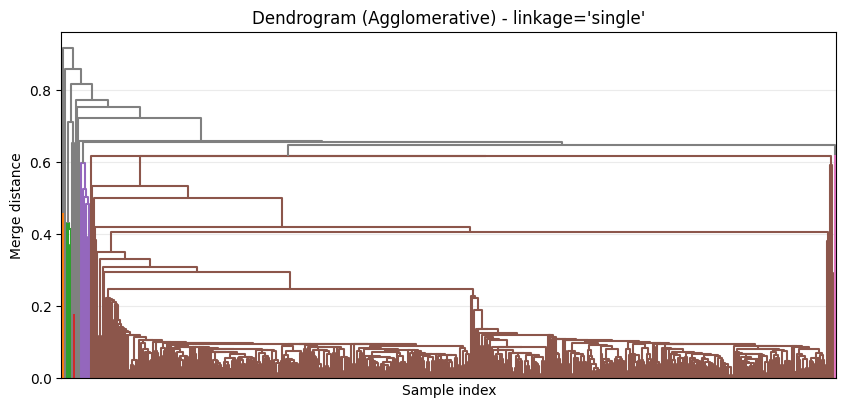

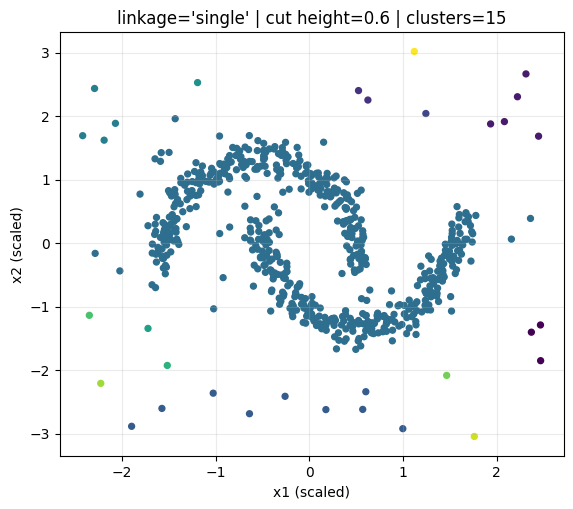

[linkage=single] cut height=0.6 -> n_clusters=15


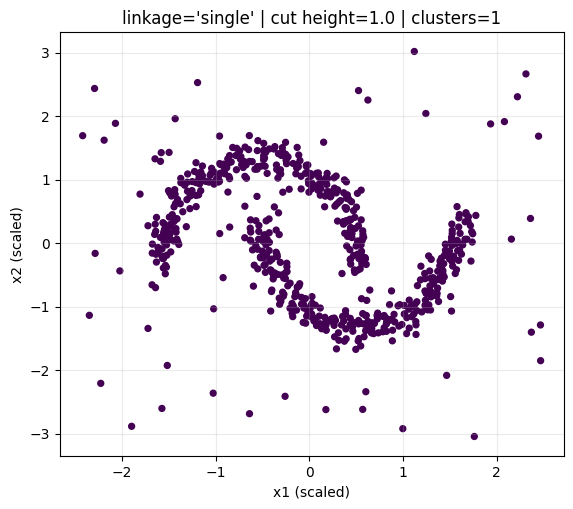

[linkage=single] cut height=1.0 -> n_clusters=1


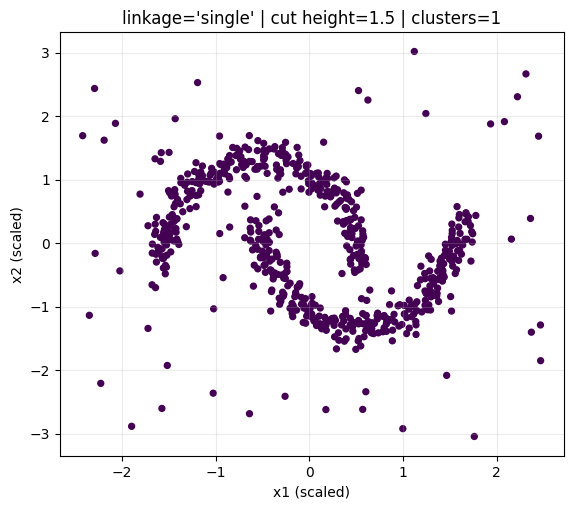

[linkage=single] cut height=1.5 -> n_clusters=1


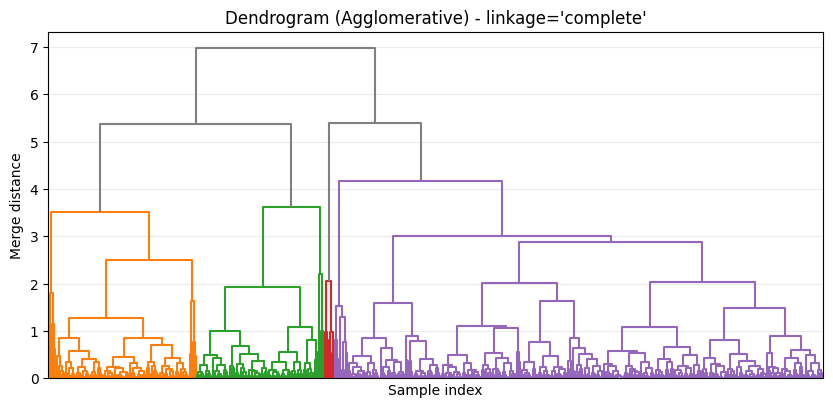

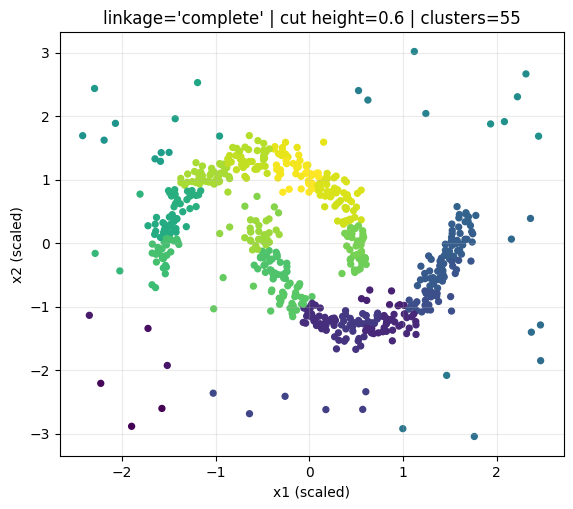

[linkage=complete] cut height=0.6 -> n_clusters=55


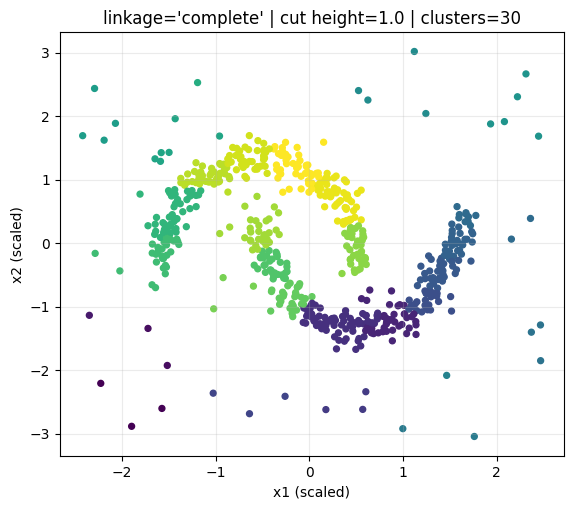

[linkage=complete] cut height=1.0 -> n_clusters=30


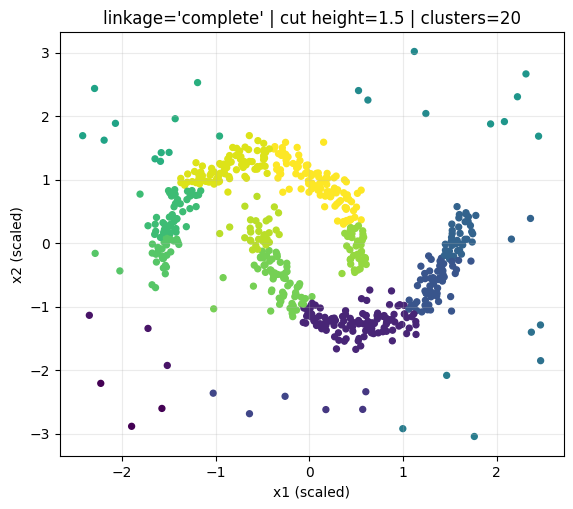

[linkage=complete] cut height=1.5 -> n_clusters=20


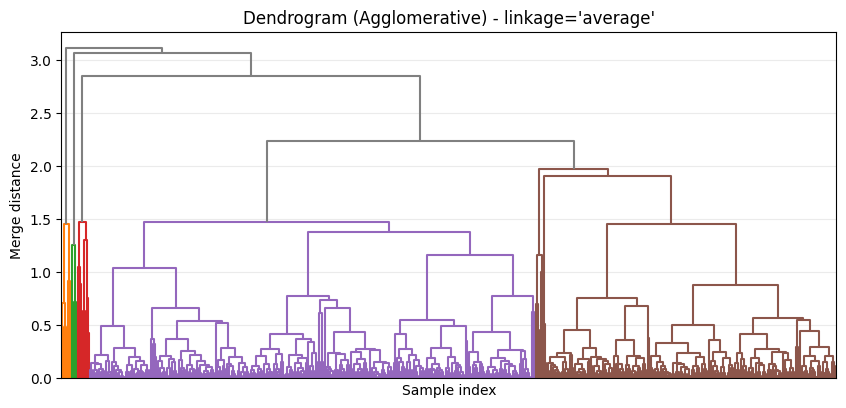

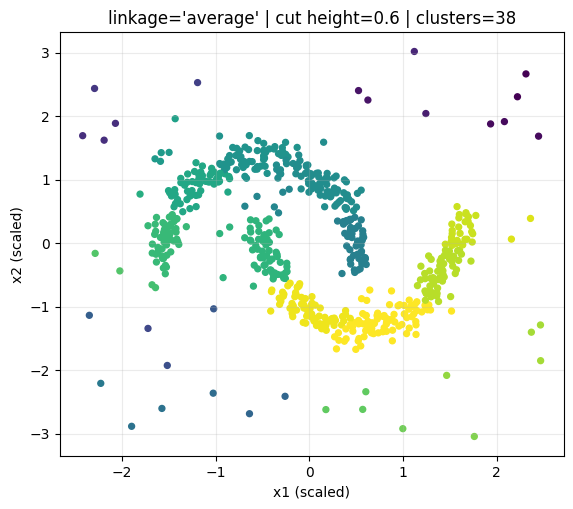

[linkage=average] cut height=0.6 -> n_clusters=38


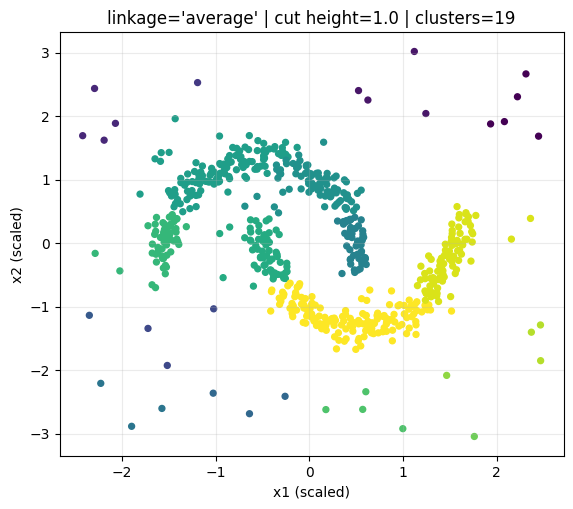

[linkage=average] cut height=1.0 -> n_clusters=19


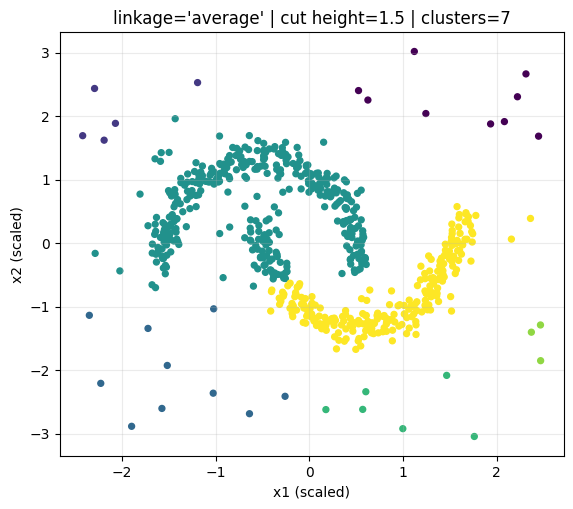

[linkage=average] cut height=1.5 -> n_clusters=7


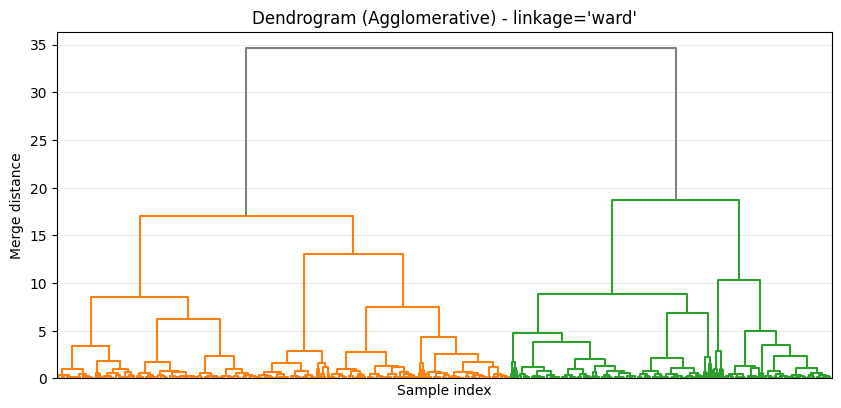

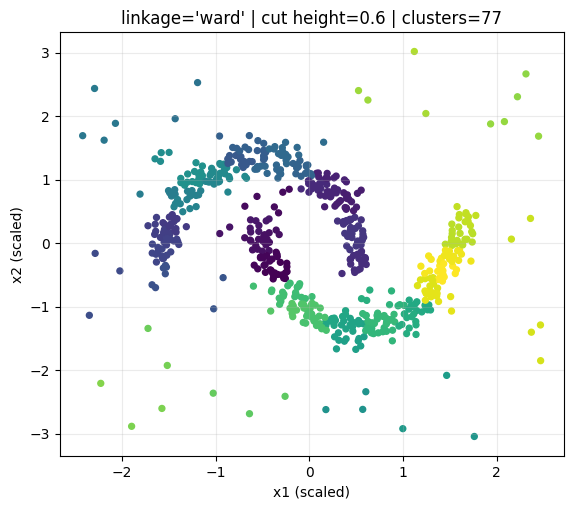

[linkage=ward] cut height=0.6 -> n_clusters=77


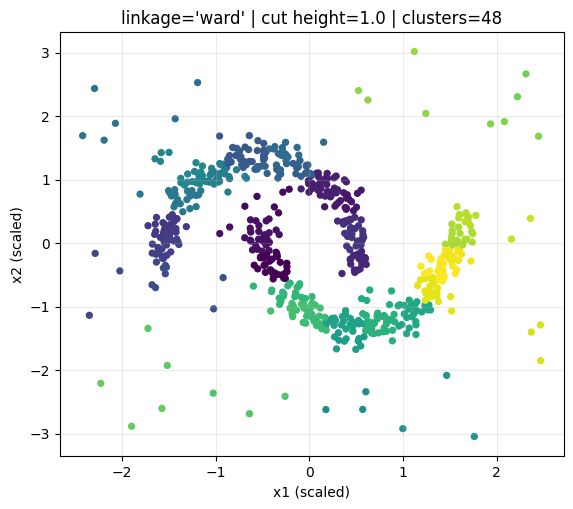

[linkage=ward] cut height=1.0 -> n_clusters=48


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# ============================================================
# 1) Generate non-convex data (two moons) + extra random noise
# ============================================================
np.random.seed(42)

n_samples = 600
X, _ = make_moons(n_samples=n_samples, noise=0.08, random_state=42)

# Add extra uniform noise points (outliers)
n_noise = 60
noise_box = np.column_stack([
    np.random.uniform(X[:, 0].min() - 0.8, X[:, 0].max() + 0.8, size=n_noise),
    np.random.uniform(X[:, 1].min() - 0.8, X[:, 1].max() + 0.8, size=n_noise),
])

X = np.vstack([X, noise_box])

# Plot raw data
plt.figure(figsize=(6.5, 5.5))
plt.scatter(X[:, 0], X[:, 1], s=18)
plt.title("Raw 2D Data: Two Moons + Extra Noise")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True, alpha=0.25)
plt.show()

# ============================================================
# 2) Scaling (important for distance-based clustering)
# ============================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(6.5, 5.5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=18)
plt.title("Scaled Data (StandardScaler)")
plt.xlabel("x1 (scaled)")
plt.ylabel("x2 (scaled)")
plt.grid(True, alpha=0.25)
plt.show()

# ============================================================
# 3) Hierarchical clustering with different linkage methods
#    - Ward requires Euclidean distance and typically prefers compact clusters
# ============================================================
linkage_methods = ["single", "complete", "average", "ward"]

# Heights for cutting dendrogram (distance thresholds)
# NOTE: These thresholds depend on scaling; adjust if needed.
cut_heights = [0.6, 1.0, 1.5]

for method in linkage_methods:
    # Build linkage matrix
    Z = linkage(X_scaled, method=method)

    # --------------------------------------------------------
    # 3a) Dendrogram
    # --------------------------------------------------------
    plt.figure(figsize=(10, 4.5))
    dendrogram(
        Z,
        no_labels=True,
        color_threshold=None,  # let it draw default colors
        above_threshold_color="gray"
    )
    plt.title(f"Dendrogram (Agglomerative) - linkage='{method}'")
    plt.xlabel("Sample index")
    plt.ylabel("Merge distance")
    plt.grid(True, alpha=0.25)
    plt.show()

    # --------------------------------------------------------
    # 3b) Cut the dendrogram at different heights and visualize
    # --------------------------------------------------------
    for h in cut_heights:
        # fcluster assigns cluster IDs based on distance threshold
        labels = fcluster(Z, t=h, criterion="distance")

        n_clusters = len(np.unique(labels))

        plt.figure(figsize=(6.5, 5.5))
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=18)
        plt.title(f"linkage='{method}' | cut height={h} | clusters={n_clusters}")
        plt.xlabel("x1 (scaled)")
        plt.ylabel("x2 (scaled)")
        plt.grid(True, alpha=0.25)
        plt.show()

        print(f"[linkage={method}] cut height={h} -> n_clusters={n_clusters}")

